<a href="https://colab.research.google.com/github/rgalea2809/practica_individual_mapas/blob/main/practica2mapas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Práctica Individual Mapas | Rodrigo Ernesto Mejía Galea | 00037119

In [1]:
import warnings
!pip install geopandas
!pip install rioxarray
#!pip install esda
!pip install pysal
!pip install contextily
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 11.2 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 KB 5.5 MB/s eta 0

In [2]:
import matplotlib.pyplot as plt  # Graphics
from matplotlib import colors
import seaborn  # Graphics
import geopandas  # Spatial data manipulation
import pandas  # Tabular data manipulation
#import rioxarray  # Surface data manipulation
#import xarray  # Surface data manipulation
#from pysal.explore import esda  # Exploratory Spatial analytics
#from pysal.lib import weights  # Spatial weights
import contextily  # Background tiles

In [31]:
#Agregar los dos archivos a utilizar
filePoblacion = geopandas.read_file(
    "https://raw.githubusercontent.com/rgalea2809/practica_individual_mapas/main/poblacion_DIGESTYC_geojson.geojson"
).set_index("fid")

fileEscuelas = geopandas.read_file(
    "https://raw.githubusercontent.com/rgalea2809/practica_individual_mapas/main/escuelas_geojson.geojson"
).set_index("fid")

In [32]:
dbPoblacion = (geopandas.GeoDataFrame(filePoblacion))
dbPoblacion.info()

dbEscuelas = (geopandas.GeoDataFrame(fileEscuelas))
dbEscuelas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 262 entries, 1 to 271
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   NOM_DPTO                   262 non-null    object  
 1   COD_DPTO                   262 non-null    object  
 2   NOM_MUN                    262 non-null    object  
 3   COD_MUN                    262 non-null    object  
 4   COD_MUN4                   262 non-null    object  
 5   TASA_POBR                  262 non-null    float64 
 6   POBR_FISDL                 262 non-null    object  
 7   POB_TOTAL                  262 non-null    int64   
 8   POB_HOMB                   262 non-null    int64   
 9   POB_MUJER                  262 non-null    int64   
 10  _dig_Codigo_Municipio_Alf  262 non-null    int64   
 11  _dig_Municipio             262 non-null    object  
 12  _dig_POB_2008              262 non-null    int64   
 13  _dig_POB_2009              

Text(0.9, 0.8, 'N')

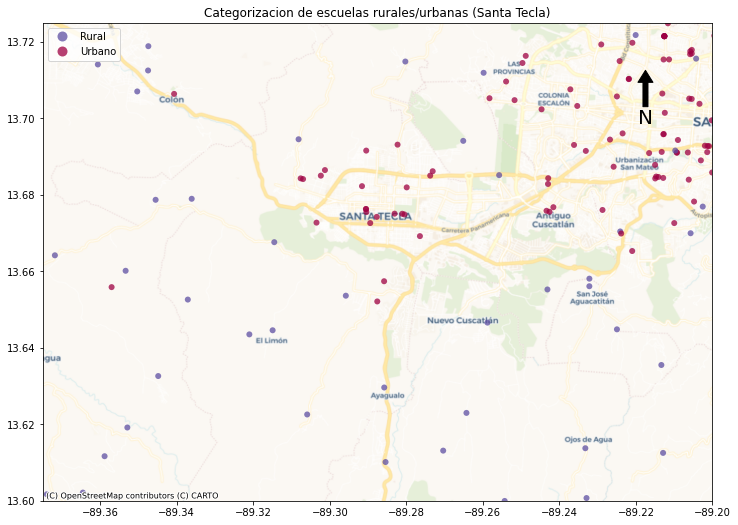

In [94]:
# Mapa a escala muinicipal (Cualitativo)
#-----------------------------------------------
# Set up figure and a single axis
f, ax = plt.subplots(1, figsize=(12, 12))

# Build choropleth
# Crea el choropleth en base al tipo de zona (Rural o Urbano)
dbEscuelas.plot(
    column="ZONA",
    cmap="Spectral_r",
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
    categorical= 1
)

# Add basemap
contextily.add_basemap(
    ax,
    crs=dbPoblacion.crs,
    zoom= 13,
    source=contextily.providers.CartoDB.Voyager,
)

# Agregar titulo
ax.set_title('Categorizacion de escuelas rurales/urbanas (Santa Tecla)')

# Centrar municipio
plt.xlim(-89.375, -89.2)
plt.ylim(13.6, 13.725)

# Agregar flecha de norte
x, y, arrow_length = 0.9, 0.9, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

Text(0.9, 0.8, 'N')

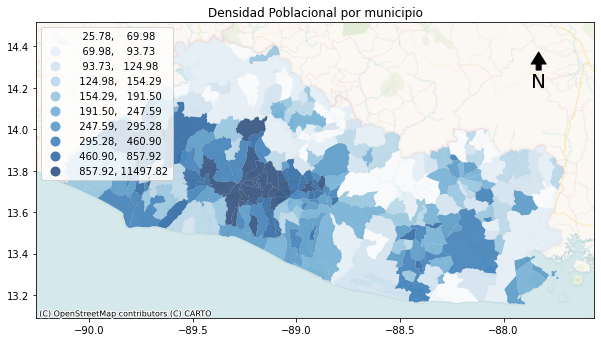

In [95]:
# Mapa de densidad poblacional (Cuantitativo)
#-----------------------------------------------
# Agregar columna nueva ("densidad")
dbPoblacion["densidad"] = dbPoblacion["_dig_POB_2009"] / dbPoblacion["areaAREA_KM2"]

# Imprimir la db con la columna nueva (opcional)
# print(dbPoblacion)
 
# Set up figure and a single axis
f, ax = plt.subplots(1, figsize=(10, 10))

# Build choropleth
# Crea el choropleth en base la densidad recien calculada
dbPoblacion.plot(
    column="densidad",
    cmap="Blues",
    scheme="quantiles",
    k=10,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)

# Add basemap
contextily.add_basemap(
    ax,
    crs=dbPoblacion.crs,
    source=contextily.providers.CartoDB.VoyagerNoLabels,
)

# Agregar titulo
ax.set_title('Densidad Poblacional por municipio')

# Agregar flecha de norte
x, y, arrow_length = 0.9, 0.9, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)